## Density plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

In [4]:
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 8000).T
x, y = data

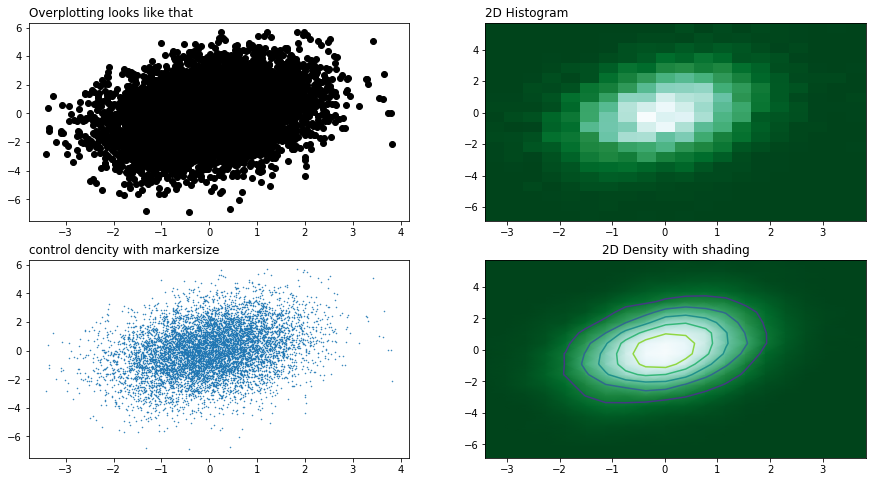

In [9]:
from scipy.stats import kde
fig, axs = plt.subplots(2, 2, figsize=(15,8))

ax = axs[0,0]
ax.set_title('Overplotting looks like that', loc='left')
ax.plot(x, y, 'ko')
 
ax = axs[1,0]
ax.set_title('control dencity with markersize', loc='left')
ax.plot(x, y, linestyle='', marker='o', markersize=0.5)

ax = axs[0,1]
nbins = 20
ax.set_title('2D Histogram', loc='left')
ax.hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)

ax = axs[1,1]
k = kde.gaussian_kde(data)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
ax.set_title('2D Density with shading')
ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
ax.contour(xi, yi, zi.reshape(xi.shape) )
print()